In [1]:
import sys
sys.executable
# sys.path

'/Users/sd/miniconda3/bin/python'

In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
# !pip install pymysql
import pymysql
from scipy import stats

In [7]:
import os
# !pip install pymysql
# import pymysql
import pandas as pd

conn = pymysql.connect(
    host="insight.cxqzkfwl6f4a.us-east-1.rds.amazonaws.com",
    port=int(3306),
    user="shoukydanindenic",
    passwd="54nuq5mi",
    db="insight",
    charset='utf8mb4')

sql = """
SELECT 	
	120 + 1 - datediff(CURDATE(), a.Create_DateTime) as "Days",
	a.Instance_UID as "Customer",
	count(*) as "Count"
FROM alert a
WHERE a.Create_DateTime >= DATE_SUB(CURDATE(), INTERVAL 119 DAY)
	AND a.Rule_Name is not NULL
	AND a.Instance_UID in ('293a66ba-6ee1-4451-81d4-50bb6e2137e1')
GROUP BY 1,2 
ORDER BY 2,1;
"""

df = pd.read_sql_query(sql, conn)


In [8]:
# df
# df.info()
# df.tail(5)
# df.sample(20)
# df.info()
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 3 columns):
Days        81 non-null int64
Customer    81 non-null object
Count       81 non-null int64
dtypes: int64(2), object(1)
memory usage: 2.0+ KB


# Bulding one DF from all entries filling the missing data with 0

In [9]:
# first we will build a complete Series/DatFrame wth 120 Entries
reference_series=pd.Series(np.arange(2,122,1))
reference_df=pd.DataFrame(reference_series,columns=['Days'])
reference_df['dummy']=999
reference_df=reference_df.set_index("Days")
# reference_df


In [10]:
customer_list=df['Customer'].unique().tolist()
customer_list

['293a66ba-6ee1-4451-81d4-50bb6e2137e1']

In [11]:
number_of_costomers=len(customer_list)
number_of_costomers

1

# New Section 

---

let's check what we can do 

In [12]:
# aa=df[df['Customer']=='ff29622b-fe7e-41cd-8c3f-eed1204ba416']
# aa=aa.set_index('Days')
# aa.rename(columns={'Customer': 'todel', 'Count': 'customer'}, inplace=True)
# aa.drop(['todel'],axis=1,inplace=True)
# reference_df=reference_df.join(aa, how='outer')

for cust in customer_list:
  a=df[df['Customer']==cust]
  a=a.set_index('Days')
  a.rename(columns={'Customer': 'todel', 'Count': cust}, inplace=True)
  a.drop(['todel'],axis=1,inplace=True)
  reference_df=reference_df.join(a, how='outer')
  


In [0]:
reference_df.fillna(0,inplace=True)
referance_df=reference_df.drop(['dummy'],axis=1,inplace=True)

In [13]:
reference_df=reference_df.astype('int64')
reference_df

ValueError: Cannot convert non-finite values (NA or inf) to integer

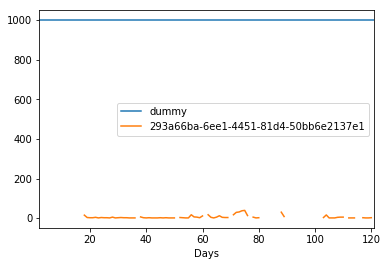

In [14]:

reference_df.plot()

In [15]:
df_sdoriginal=reference_df.copy()
df_sd=reference_df.copy()
df_sdoriginal

,dummy,293a66ba-6ee1-4451-81d4-50bb6e2137e1
Days,,
2,999,NaN
3,999,NaN
4,999,NaN
5,999,NaN
6,999,NaN
7,999,NaN
8,999,NaN
9,999,NaN
10,999,NaN


# here we check running "0"

In [16]:
col_list=df_sdoriginal.columns

print("col_list {}".format(col_list))

df_sd.head()

for c in col_list:
    a=df_sd[c]
    b=[0]*len(a)
    for i in range(len(a)):
        if a.iloc[i] == 0:
            b[i] = b[i-1] + 1
        else:
            b[i] = 0
    #print ('this is the list of consecative 0 in the {} Column {}'.format(c,b) )
    #b=pd.Series(b) 
    df_sd[c+"-0s"]= pd.Series(b, index=df_sd.index)
    df_sd
df_sd.head()
col_list

col_list Index(['dummy', '293a66ba-6ee1-4451-81d4-50bb6e2137e1'], dtype='object')


Index(['dummy', '293a66ba-6ee1-4451-81d4-50bb6e2137e1'], dtype='object')

# Now we check the AVG and STD for 4 consequetive numbers

In [17]:
for c in col_list:
    df_sd[c+'-avg_4'] = (df_sdoriginal[c].rolling(4).mean())
    df_sd[c+'-std_4'] = (df_sdoriginal[c].rolling(4).std())

In [18]:
df_sd.head()

,dummy,293a66ba-6ee1-4451-81d4-50bb6e2137e1,dummy-0s,293a66ba-6ee1-4451-81d4-50bb6e2137e1-0s,dummy-avg_4,dummy-std_4,293a66ba-6ee1-4451-81d4-50bb6e2137e1-avg_4,293a66ba-6ee1-4451-81d4-50bb6e2137e1-std_4
Days,,,,,,,,
2,999,NaN,0,0,NaN,NaN,NaN,NaN
3,999,NaN,0,0,NaN,NaN,NaN,NaN
4,999,NaN,0,0,NaN,NaN,NaN,NaN
5,999,NaN,0,0,999.0,0.0,NaN,NaN
6,999,NaN,0,0,999.0,0.0,NaN,NaN


In [19]:
 col_list

Index(['dummy', '293a66ba-6ee1-4451-81d4-50bb6e2137e1'], dtype='object')

Max 0s {} 0


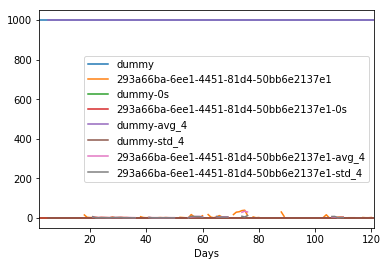

In [20]:
print("Max 0s {}",df_sd[c+"-0s"].max())

df_sd.plot()

In [21]:
# df_sd.info()
for c in col_list:
    df_sd[c+'res'] = (df_sd[c+"-0s"]>2) | (df_sd[c]<(df_sd[c+'-avg_4']-df_sd[c+'-std_4']))


In [22]:
for c in col_list:
    print ("for the ", c , "check the following",df_sd[c+'res'][df_sd[c+'res']==True])

for the  dummy check the following Series([], Name: dummyres, dtype: bool)
for the  293a66ba-6ee1-4451-81d4-50bb6e2137e1 check the following Days
27    True
34    True
76    True
Name: 293a66ba-6ee1-4451-81d4-50bb6e2137e1res, dtype: bool


In [23]:
for c in col_list:
    print(df_sd[c+'res'][df_sd[c+'res']==True])

Series([], Name: dummyres, dtype: bool)
Days
27    True
34    True
76    True
Name: 293a66ba-6ee1-4451-81d4-50bb6e2137e1res, dtype: bool


In [24]:
col_list=df_sd.columns
col_res=[c for c in col_list]

col_res[-number_of_costomers:]

['293a66ba-6ee1-4451-81d4-50bb6e2137e1res']

In [25]:
%matplotlib inline
final=df_sd[col_res[-number_of_costomers:]]


In [26]:
# sns.set()

# fig, axes = plt.subplots(nrows=number_of_costomers,figsize=(30, 200))

# for j,i in enumerate(final.columns):
#   (final[i]*1).plot.bar(ax=axes[j],color='b',title= i,yticks=(0,1) );
#   axes[j].title.set_size(20);
  



# The drawing takes some time so be patient  👌🎈 

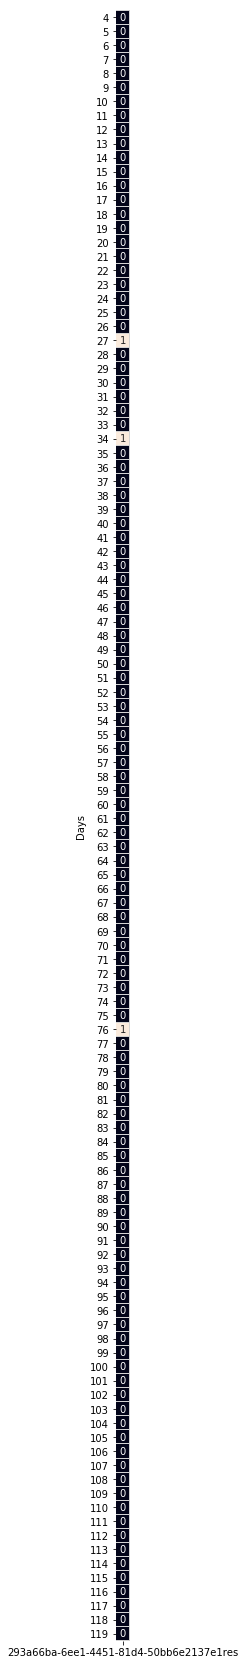

In [27]:
fig, ax = plt.subplots(figsize=(30, 30))
sns.heatmap(ax=ax, data=final[2:118], linecolor='lightgrey', linewidths=.01,cbar=False,annot=True,square =True) 

    

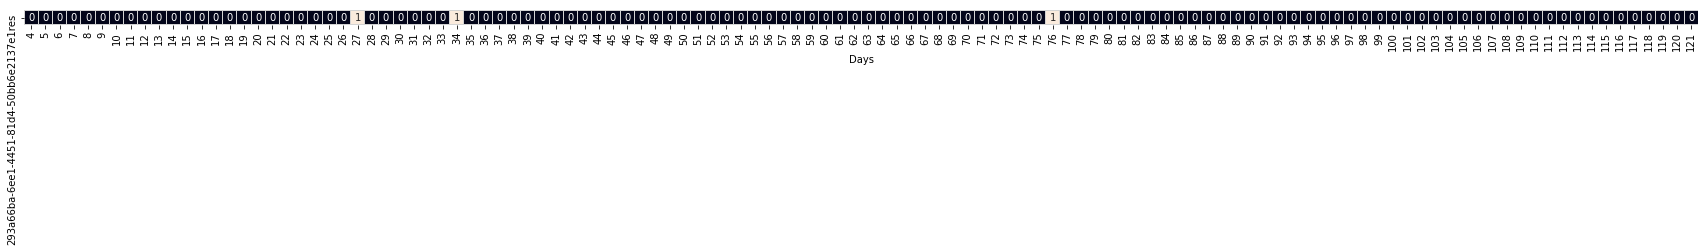

In [28]:
#final.loc[2:100]
fig, ax = plt.subplots(figsize=(30, 30))
sns.heatmap(ax=ax, data=final[2:120].T, linecolor='lightgrey', linewidths=.01,cbar=False,annot=True,square =True) 